# About Dataset

The dataset offers comprehensive information on health factors influencing osteoporosis development, including demographic details, lifestyle choices, medical history, and bone health indicators. It aims to facilitate research in osteoporosis prediction, enabling machine learning models to identify individuals at risk. Analyzing factors like age, gender, hormonal changes, and lifestyle habits can help improve osteoporosis management and prevention strategies.

### Age
The age of the individual in years.

### Gender
The gender of the individual. This can be either "Male" or "Female".

### Hormonal Changes
Indicates whether the individual has undergone hormonal changes, particularly related to menopause. This can be 'Normal', 'Postmenopausal'

### Family History
Indicates whether there is a family history of osteoporosis or fractures. This can be "Yes" or "No".

### Race/Ethnicity
The race or ethnicity of the individual. This can include categories such as "Caucasian", "African American", "Asian", etc.

### Body Weight
The body weight status of the individual. This can be "Normal" or "Underweight".

### Calcium Intake
The level of calcium intake in the individual's diet. This can be "Low" or "Adequate".

### Vitamin D Intake
The level of vitamin D intake in the individual's diet. This can be "Insufficient" or "Sufficient".

### Physical Activity
Indicates the level of physical activity of the individual. This can be "Sedentary" for low activity levels or "Active"

### Smoking
Indicates whether the individual is a smoker. This can be "Yes" or "No".

### Alcohol Consumption
Indicates the level of alcohol consumption by the individual. This can be "None" for non-drinkers or "Moderate" for moderate


### Medical Conditions
Any existing medical conditions that the individual may have. This can include conditions like "Rheumatoid Arthritis" or "NaN" or "Hyperthyroidism"

### Medications
Any medications that the individual is currently taking. This can include medications like "Corticosteroids" or "NaN"


### Prior Fractures
Indicates whether the individual has previously experienced fractures. This can be "Yes" or "No"


### Osteoporosis
The target variable indicating the presence or absence of osteoporosis. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('osteoporosis.csv')
df.head()
# The project starts by loading the dataset 'osteoporosis.csv' using pandas and displaying the first few rows to understand 
# the data structure and content.

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [3]:
df.info() 
# The `df.info()` function is used to provide a summary of the dataset, including the number of entries, columns, non-null 
# counts, and data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [4]:
df.describe()
# The `df.describe()` function provides statistical insights into numerical columns like 'Age' and 'Osteoporosis', showing 
# mean, standard deviation, minimum, maximum, median, and quartiles.

,Id,Age,Osteoporosis
count,1.958000e+03,1958.000000,1958.000000
mean,1.549929e+06,39.101124,0.500000
std,2.614250e+05,21.355424,0.500128
min,1.100064e+06,18.000000,0.000000
25%,1.319163e+06,21.000000,0.000000
50%,1.546028e+06,32.000000,0.500000
75%,1.775870e+06,53.000000,1.000000
max,1.999676e+06,90.000000,1.000000


In [5]:
# Fill missing values in "Alcohol Consumption" column
df['Alcohol Consumption'].fillna('None', inplace=True)

# Fill missing values in "Medications" column
df['Medications'].fillna('None', inplace=True)

# Fill missing values in "Medical Conditions" column
df['Medical Conditions'].fillna('None', inplace=True)

# Filling null values with 'None' helps maintain data consistency, makes analysis easier, and improves overall data quality.

In [6]:
df['Osteoporosis'].value_counts()
# value_counts()` function is used to show the distribution of the target variable 'Osteoporosis' (0: No, 1: Yes).

Osteoporosis
1    979
0    979
Name: count, dtype: int64

In [7]:
df.isna().sum()
# df.isna().sum() Use for checking Null Values in the data

Id                     0
Age                    0
Gender                 0
Hormonal Changes       0
Family History         0
Race/Ethnicity         0
Body Weight            0
Calcium Intake         0
Vitamin D Intake       0
Physical Activity      0
Smoking                0
Alcohol Consumption    0
Medical Conditions     0
Medications            0
Prior Fractures        0
Osteoporosis           0
dtype: int64

In [8]:
df.drop('Id', axis=1, inplace=True)
# The 'Id' column is dropped from the dataset as it is deemed unnecessary for the analysis.  

In [9]:
df.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1


# Exploratory Data Analysis (EDA)

# **Age:**

**What is the Distribution of ages in the dataset ?**

**How does age correlate with the likeihood of osteporosis ?**

In [10]:
# Age Distribution 
age_distribution = df['Age'].value_counts().sort_index()
print(age_distribution)

# Correlation between age and osteporosis
age_osteporosis_corr = df['Age'].corr(df['Osteoporosis'])
print(f"Correlation between age and osteoporosis: {age_osteporosis_corr}")

Age
18    152
19    147
20    109
21    117
22     99
     ... 
86     14
87     13
88      9
89     13
90      9
Name: count, Length: 73, dtype: int64
Correlation between age and osteoporosis: 0.6912382540603558


# **Gender :**
  
**What is the the gender distribution in the dataset ?**

**is there a significant difference in osteoporosis risk between genders?**

In [11]:
# Gender Distribution 
gender_distribution = df['Gender'].value_counts()
print(gender_distribution)

# Osteoporosis risk by gender
osteoporosis_by_gender = df.groupby('Gender')['Osteoporosis'].mean()
print(osteoporosis_by_gender)

Gender
Male      992
Female    966
Name: count, dtype: int64
Gender
Female    0.493789
Male      0.506048
Name: Osteoporosis, dtype: float64


# **Hormonal Change :**

**How does hormonal change affect the risk of osteoporosis?**

In [12]:
# Osteoporosis risk by hormonal change

osteoporosis_by_hormonal_change = df.groupby('Hormonal Changes')['Osteoporosis'].mean()
print(osteoporosis_by_hormonal_change)

Hormonal Changes
Normal            0.492355
Postmenopausal    0.507677
Name: Osteoporosis, dtype: float64


# **Family History:**

**What percentage of individuals with a family history of osteoporosis develop the condition?**

In [13]:
# Percentage of individuals with family history developing osteoporosis 

family_history_osteoporosis_perc = df.groupby('Family History')['Osteoporosis'].mean() 
print(family_history_osteoporosis_perc)

Family History
No     0.501002
Yes    0.498958
Name: Osteoporosis, dtype: float64


# **Race/Ethnicity:**

**How does race/ethnicity relate to the prevalence of osteoporosis?**

In [14]:
# Osteoporosis prevalence by race/ ethnicity

osteoporosis_by_race = df.groupby('Race/Ethnicity')['Osteoporosis'].mean() 
print(osteoporosis_by_race)

Race/Ethnicity
African American    0.505140
Asian               0.497623
Caucasian           0.496904
Name: Osteoporosis, dtype: float64


# **Calcium Intake:**

**How does calcium intake affect the risk of osteoporosis?**

In [15]:
# Osteoporosis risk by calcium intake 

osteoporosis_by_calcium_intake = df.groupby('Calcium Intake')['Osteoporosis'].mean() 
print(osteoporosis_by_calcium_intake)

Calcium Intake
Adequate    0.502096
Low         0.498008
Name: Osteoporosis, dtype: float64


# **Vitamin D Intake:**

**What is the relationship between vitamin D intake and osteoporosis risk?**

In [16]:
# Osteoporosis risk by vitamin D intake 

osteoporosis_by_vitamin_d_intake = df.groupby('Vitamin D Intake')['Osteoporosis'].mean() 
print(osteoporosis_by_vitamin_d_intake)

Vitamin D Intake
Insufficient    0.491024
Sufficient      0.508408
Name: Osteoporosis, dtype: float64


# **Physical Activity:**

**Does physical activity level impact the likelihood of osteoporosis?**

In [17]:
# Osteoporosis risk by physical activity level 

osteoporosis_by_physical_activity = df.groupby('Physical Activity')['Osteoporosis'].mean()
print(osteoporosis_by_physical_activity )

Physical Activity
Active       0.490695
Sedentary    0.510139
Name: Osteoporosis, dtype: float64


# **Smoking:**

**What is the association between smoking and osteoporosis risk?**

In [18]:
# Osteoporosis risk by smoking status 

osteoporosis_by_smoking = df.groupby('Smoking')['Osteoporosis'].mean() 
print(osteoporosis_by_smoking)

Smoking
No     0.508197
Yes    0.491853
Name: Osteoporosis, dtype: float64


# **Alcohol Consumption:**

**How does alcohol consumption relate to osteoporosis risk?**

In [19]:
# Osteoporosis risk by alcohol consumption

osteoporosis_by_alcohol_consumption = df.groupby('Alcohol Consumption')['Osteoporosis'].mean()
print(osteoporosis_by_alcohol_consumption)

Alcohol Consumption
Moderate    0.501031
None        0.498988
Name: Osteoporosis, dtype: float64


# **Medical Conditions:**

**Do certain medical conditions increase the risk of osteoporosis?**

In [20]:
# Osteoporosis risk by medical conditions

osteoporosis_by_medical_conditions = df.groupby('Medical Conditions')['Osteoporosis'].mean()
print(osteoporosis_by_medical_conditions)

Medical Conditions
Hyperthyroidism         0.505900
None                    0.491499
Rheumatoid Arthritis    0.502370
Name: Osteoporosis, dtype: float64


# **Medications:**

**Is there a correlation between certain medications and osteoporosis risk?**

In [21]:
# Osteoporosis risk by medications 
osteoporosis_by_medications = df.groupby('Medications')['Osteoporosis'].mean() 
print(osteoporosis_by_medications)

Medications
Corticosteroids    0.516958
None               0.483249
Name: Osteoporosis, dtype: float64


# **Prior Fractures:**

**How does a history of prior fractures influence the risk of osteoporosis?**

In [22]:
# Osteoporosis risk by prior fractures 
osteoporosis_by_prior_fractures = df.groupby('Prior Fractures')['Osteoporosis'].mean() 
print(osteoporosis_by_prior_fractures)

Prior Fractures
No     0.492308
Yes    0.507630
Name: Osteoporosis, dtype: float64


# **Age and Gender Interaction:**

**How does the interaction between age and gender impact osteoporosis risk?**

In [23]:
# Osteoporosis risk by age and gender 

osteoporosis_by_age_gender = df.groupby(['Age', 'Gender'])['Osteoporosis'].mean() 
print(osteoporosis_by_age_gender)

Age  Gender
18   Female    0.131579
     Male      0.131579
19   Female    0.116883
     Male      0.071429
20   Female    0.105263
                 ...   
88   Male      1.000000
89   Female    1.000000
     Male      1.000000
90   Female    1.000000
     Male      1.000000
Name: Osteoporosis, Length: 145, dtype: float64


# **Body Weight and Calcium Intake Interaction:**

**Is there an interaction effect between body weight and calcium intake on osteoporosis risk?**

In [24]:
# Osteoporosis risk by body weight and calcium intake 
osteoporosis_by_body_weight_calcium = df.groupby(['Body Weight', 'Calcium Intake'])['Osteoporosis'].mean() 
print(osteoporosis_by_body_weight_calcium)

Body Weight  Calcium Intake
Normal       Adequate          0.492901
             Low               0.473783
Underweight  Adequate          0.511931
             Low               0.525532
Name: Osteoporosis, dtype: float64


# **Physical Activity:**

**Does physical activity level impact the likelihood of osteoporosis?**

In [25]:
# Osteoporosis risk by physical activity level 

osteoporosis_by_physical_activity = df.groupby('Physical Activity')['Osteoporosis'].mean()
print(osteoporosis_by_physical_activity )

Physical Activity
Active       0.490695
Sedentary    0.510139
Name: Osteoporosis, dtype: float64


# **Smoking:**

**What is the association between smoking and osteoporosis risk?**

In [26]:
# Osteoporosis risk by smoking status 
osteoporosis_by_smoking = df.groupby('Smoking')['Osteoporosis'].mean() 
print(osteoporosis_by_smoking)

Smoking
No     0.508197
Yes    0.491853
Name: Osteoporosis, dtype: float64


# **Medical Conditions Impact:**

**Which specific medical conditions are strongly associated with osteoporosis risk?**

In [27]:
# Osteoporosis risk by medical conditions

osteoporosis_by_medical_conditions = df.groupby('Medical Conditions')['Osteoporosis'].mean().sort_values(ascending=False)
print(osteoporosis_by_medical_conditions)

Medical Conditions
Hyperthyroidism         0.505900
Rheumatoid Arthritis    0.502370
None                    0.491499
Name: Osteoporosis, dtype: float64


# **Medications Impact:**

**Do certain medications show a strong correlation with osteoporosis risk?**

In [28]:
# Osteoporosis risk by medications

osteoporosis_by_medications =df.groupby('Medications')['Osteoporosis'].mean().sort_values(ascending=False)
print(osteoporosis_by_medications)

Medications
Corticosteroids    0.516958
None               0.483249
Name: Osteoporosis, dtype: float64


# **Prior Fractures Impacts**

**How does the interaction between prior fractures and age affect osteoporosis risk?**

In [29]:
# Osteoporosis risk by prior fractures and age

osteoporosis_by_prior_fractures_age = df.groupby(['Prior Fractures', 'Age'])['Osteoporosis'].mean() 
print(osteoporosis_by_prior_fractures_age)

Prior Fractures  Age
No               18     0.066667
                 19     0.109589
                 20     0.125000
                 21     0.103448
                 22     0.145833
                          ...   
Yes              86     1.000000
                 87     1.000000
                 88     1.000000
                 89     1.000000
                 90     1.000000
Name: Osteoporosis, Length: 146, dtype: float64


# **Alcohol Consumption and Smoking Interaction:**

**Is there a combined effect of alcohol consumption and smoking on osteoporosis risk?**

In [30]:
# Osteoporosis risk by alcohol consumption and smoking

osteoporosis_by_alcohol_smoking = df.groupby(['Alcohol Consumption', 'Smoking'])['Osteoporosis'].mean() 
print(osteoporosis_by_alcohol_smoking)

Alcohol Consumption  Smoking
Moderate             No         0.502075
                     Yes        0.500000
None                 No         0.514170
                     Yes        0.483806
Name: Osteoporosis, dtype: float64


# **Race/Ethnicity and Vitamin D Intake Impact:**

**How do race/ethnicity and vitamin D intake collectively influence osteoporosis risk?**

In [31]:
# Osteoporosis risk by race/ethnicity and vitamin D intake

osteoporosis_by_race_vitamin_d = df.groupby(['Race/Ethnicity', 'Vitamin D Intake'])['Osteoporosis'].mean()
print(osteoporosis_by_race_vitamin_d)

Race/Ethnicity    Vitamin D Intake
African American  Insufficient        0.506211
                  Sufficient          0.504178
Asian             Insufficient        0.483871
                  Sufficient          0.510903
Caucasian         Insufficient        0.482540
                  Sufficient          0.510574
Name: Osteoporosis, dtype: float64


# **Age Distribution:**

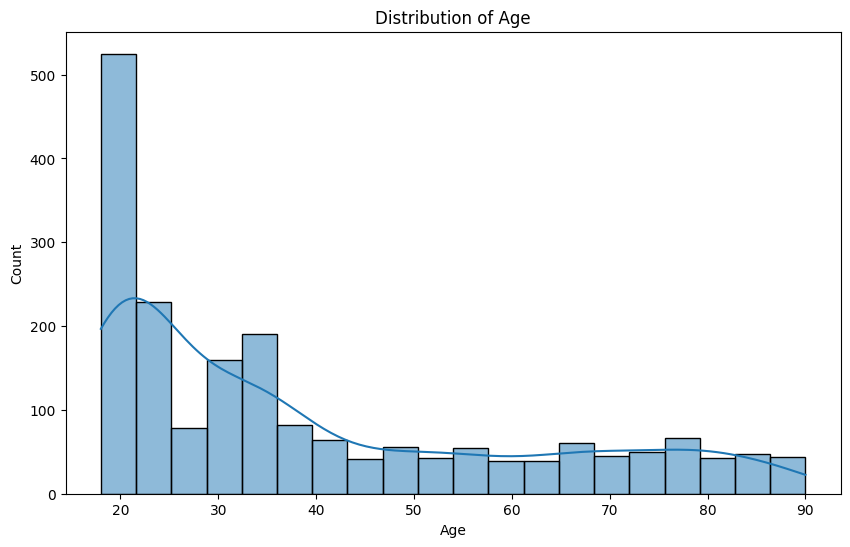

In [32]:
# Use a histogram to visualize the distribution of ages in the dataset

plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

# **Osteoporosis by Gender:**

**Use a bar plot to compare the mean osteoporosis risk between genders.**

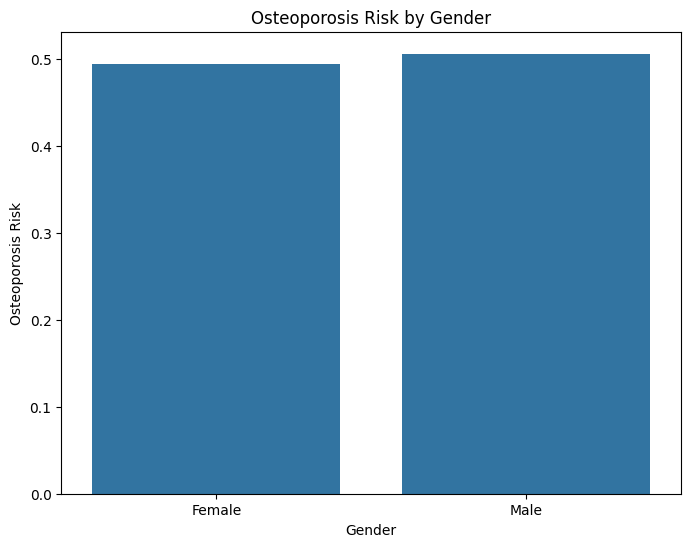

In [33]:
# Osteoporosis risk by gender

plt.figure(figsize=(8,6))
sns.barplot(x='Gender', y='Osteoporosis', data=df, ci=None)
plt.xlabel('Gender')
plt.ylabel('Osteoporosis Risk')
plt.title('Osteoporosis Risk by Gender')
plt.show()

# **Osteoporosis by Race/Ethnicity:**

**Create a box plot to compare the distribution of osteoporosis risk among different race/ethnicity groups.**

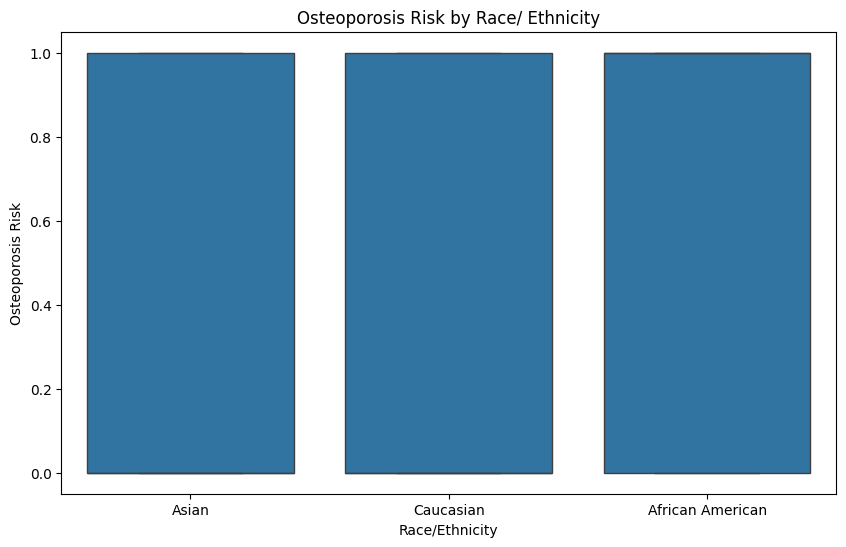

In [34]:
# Osteoporosis risk by race/ethnicity 
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='Race/Ethnicity', y='Osteoporosis', data=df)
plt.xlabel('Race/Ethnicity') 
plt.ylabel('Osteoporosis Risk') 
plt.title('Osteoporosis Risk by Race/ Ethnicity')
plt.show()

# **Age and Osteoporosis Relationship:**

**Use a scatter plot to visualize the relationship between age and osteoporosis risk.**

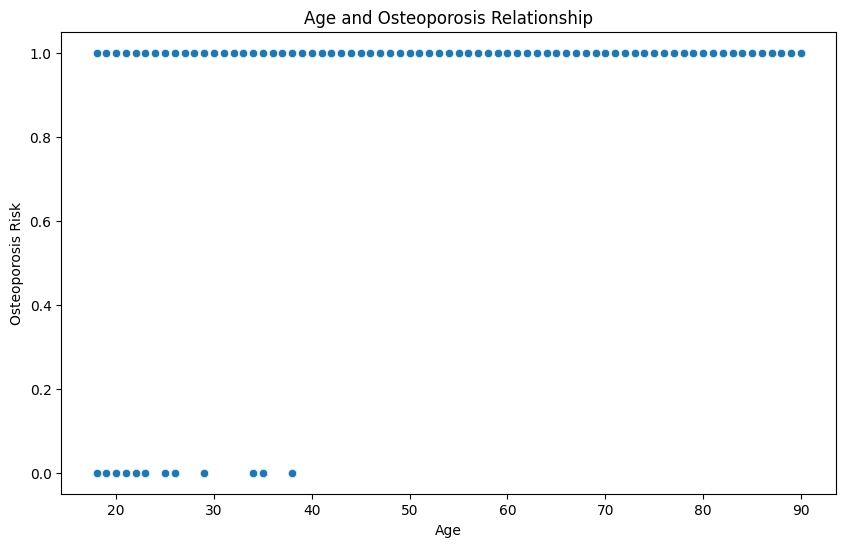

In [35]:
#Age and osteoporosis relationship 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Osteoporosis', data=df)
plt.xlabel('Age')
plt.ylabel('Osteoporosis Risk')
plt.title('Age and Osteoporosis Relationship')
plt.show()

In [36]:
df.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1


# **Pairplot for multiple variables **

**Use a pairplot to visualize the relationships between multiple numerical variables.**

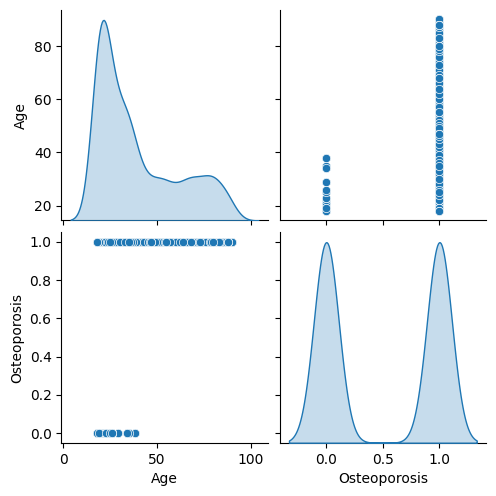

In [37]:
sns.pairplot(df[['Age', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Osteoporosis']], diag_kind='kde')
plt.show()

#These visualizations and analyses should provide you with a deeper understanding of the osteoporosis doet and its 
#underlying patterns

# **Age and Gender Distribution:**

**How does the distribution of age vary between different genders?**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


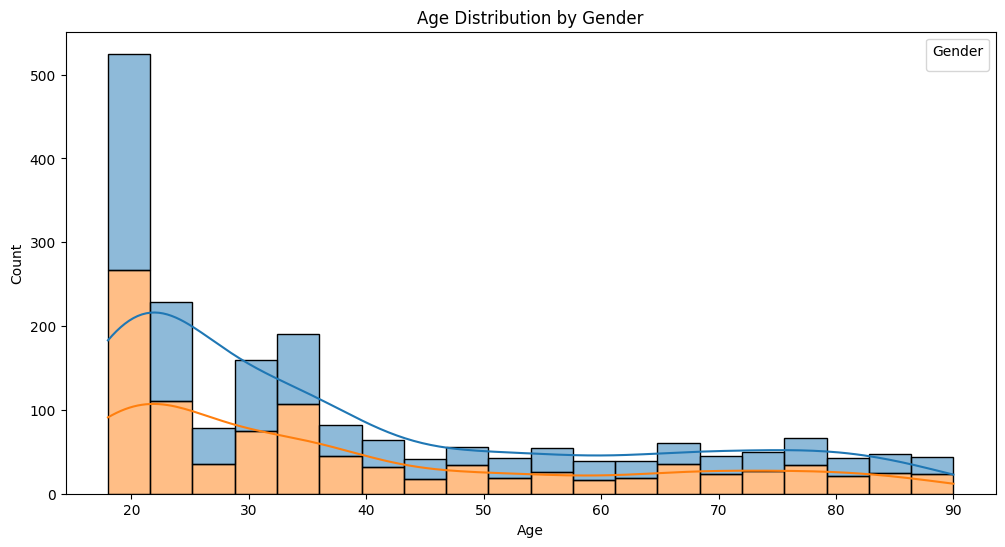

In [38]:
# Age distribution by gender
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Gender', multiple='stack', bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Gender')
plt.legend(title='Gender')
plt.show()

# **Osteoporosis Risk by Hormonal Change:**

**What is the average osteoporosis risk for individuals with different hormonal changes?**

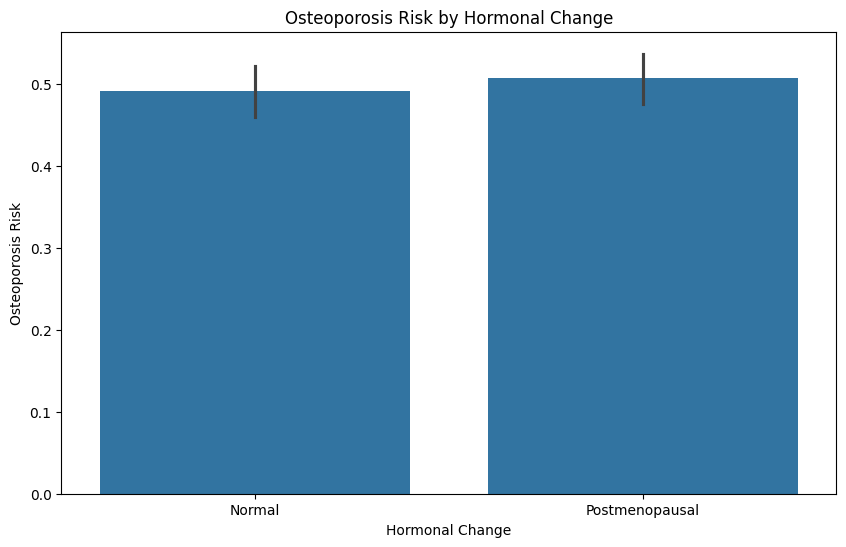

In [39]:
# Osteoporosis risk by hormonal change
plt.figure(figsize=(10, 6))
sns.barplot(x='Hormonal Changes', y='Osteoporosis', data=df) 
plt.xlabel('Hormonal Change') 
plt.ylabel('Osteoporosis Risk') 
plt.title('Osteoporosis Risk by Hormonal Change') 
plt.show()

# **Family History Impact on Osteoporosis Risk:**

**How does having a family history of osteoporosis affect an individual's osteoporosis risk?**

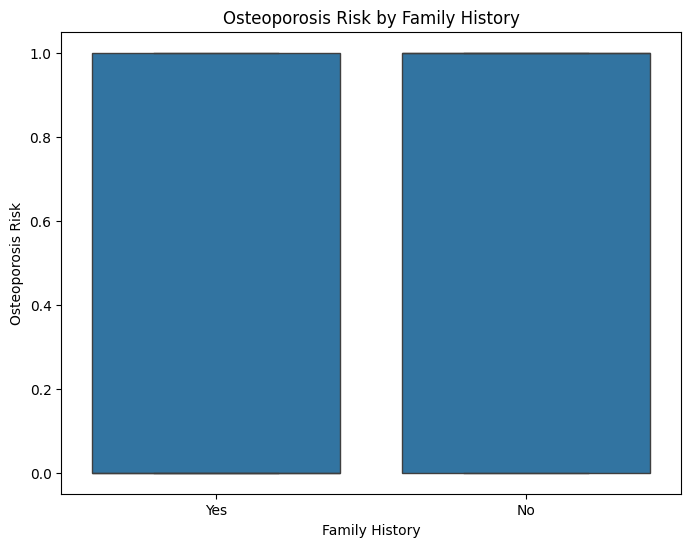

In [40]:
# Osteoporosis risk by family history

plt.figure(figsize=(8, 6))
sns.boxplot(x='Family History',y='Osteoporosis', data=df)
plt.xlabel('Family History')
plt.ylabel('Osteoporosis Risk')
plt.title('Osteoporosis Risk by Family History')
plt.show()

# **Race/Ethnicity and Medical Conditions:**

**How do race/ethnicity and medical conditions collectively influence osteoporosis risk?**

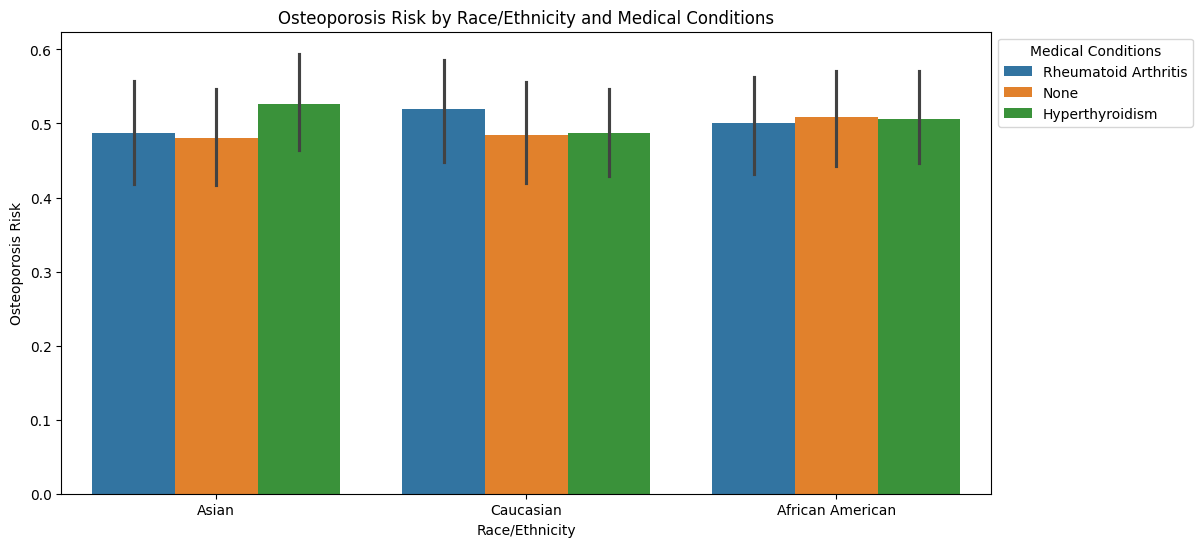

In [41]:
# Osteoporosis risk by race/ethnicity and medical conditions

plt.figure(figsize=(12, 6))
sns.barplot(x='Race/Ethnicity', y='Osteoporosis', hue='Medical Conditions', data=df)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Osteoporosis Risk')
plt.title('Osteoporosis Risk by Race/Ethnicity and Medical Conditions')
plt.legend(title='Medical Conditions', bbox_to_anchor=(1, 1))
plt.show()

# **Osteoporosis Risk by Medications and Prior Fractures:**

**How do medications and prior fractures collectively impact osteoporosis risk?**

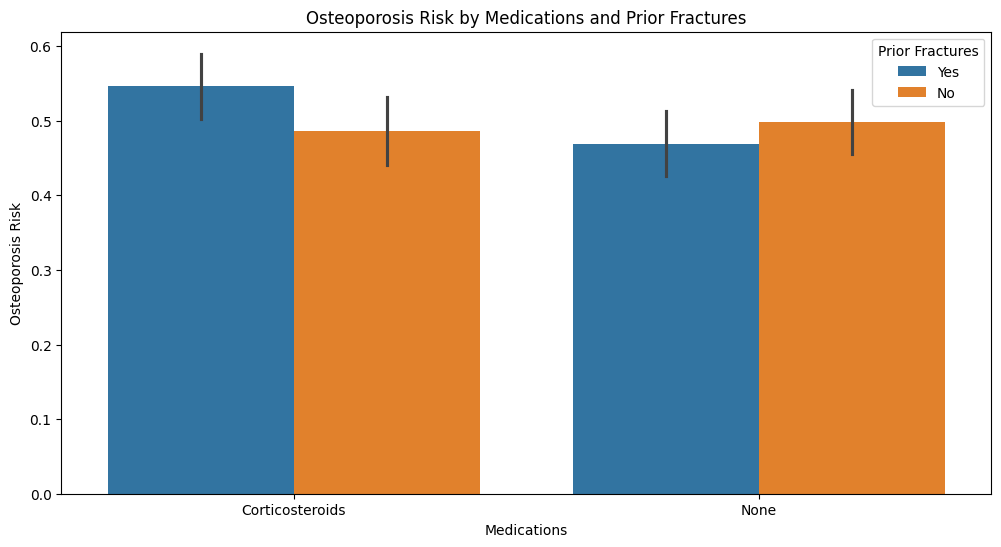

In [42]:
# Osteoporosis risk by medications and prior fractures 
plt.figure(figsize=(12,6)) 
sns.barplot(x='Medications', y='Osteoporosis', hue='Prior Fractures', data=df) 
plt.xlabel('Medications') 
plt.ylabel('Osteoporosis Risk') 
plt.title('Osteoporosis Risk by Medications and Prior Fractures') 
plt.legend(title='Prior Fractures',bbox_to_anchor= (1, 1))
plt.show()

# **Calcium and Vitamin D Intake Interaction:**

**Is there an interaction effect between calcium intake and vitamin D intake on osteoporosis risk?**

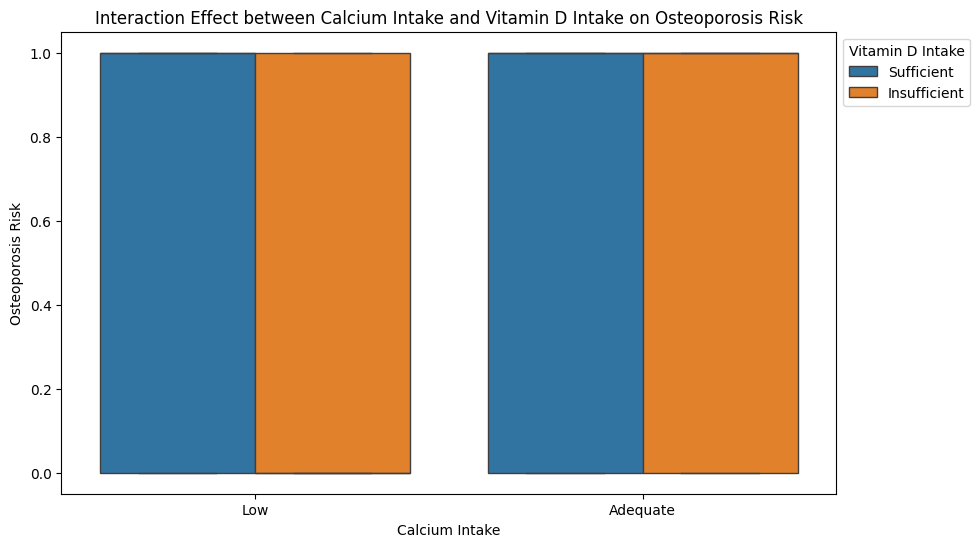

In [43]:
# Interaction effect between calcium intake and vitamin D intake on osteoporosis risk
plt.figure(figsize=(10, 6))
sns.boxplot(x='Calcium Intake', y='Osteoporosis', hue='Vitamin D Intake', data=df)
plt.xlabel('Calcium Intake')
plt.ylabel('Osteoporosis Risk')
plt.title('Interaction Effect between Calcium Intake and Vitamin D Intake on Osteoporosis Risk')
plt.legend(title='Vitamin D Intake', bbox_to_anchor=(1, 1))
plt.show()

# **Physical Activity and Smoking Impact:**

**How do physical activity level and smoking status collectively influence osteoporosis risk?**

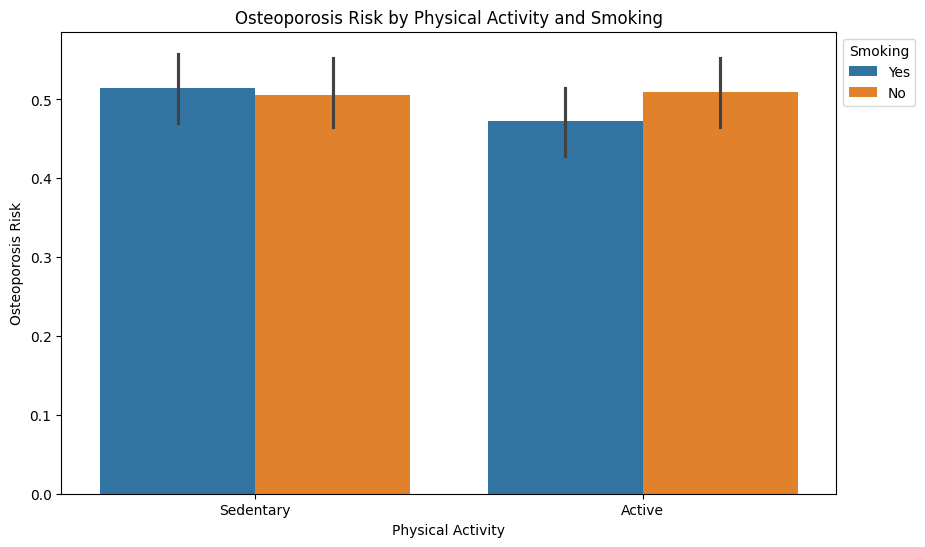

In [44]:
# Osteoporosis risk by physical activity and smoking

plt.figure(figsize=(10, 6))
sns.barplot(x='Physical Activity',y='Osteoporosis', hue='Smoking', data=df)
plt.xlabel('Physical Activity') 
plt.ylabel('Osteoporosis Risk')
plt.title('Osteoporosis Risk by Physical Activity and Smoking')
plt.legend(title='Smoking', bbox_to_anchor=(1, 1))
plt.show()

# **Body Weight and Age Interaction:**

**How does the interaction between body weight and age affect osteoporosis risk?**

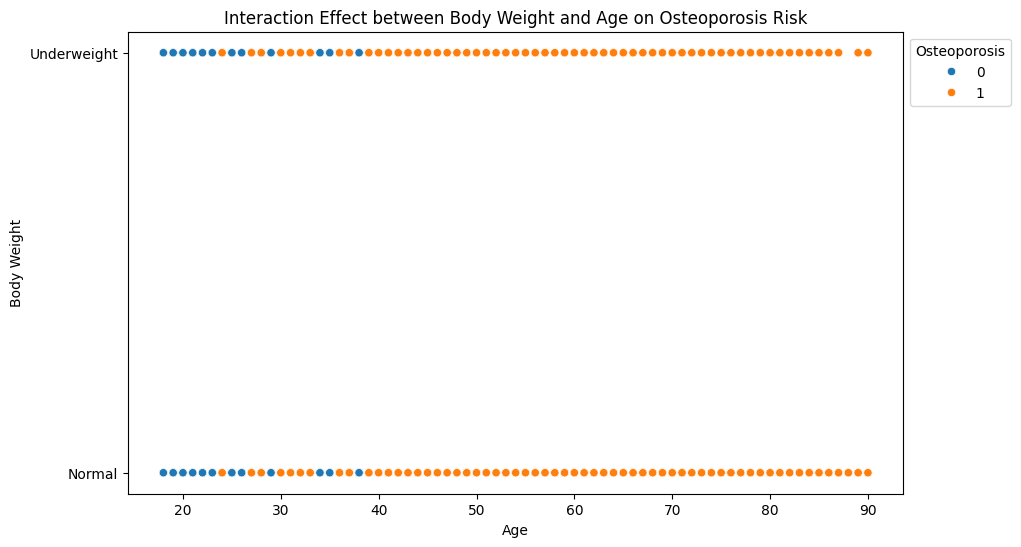

In [45]:
# Interaction effect between body weight and age on osteoporosis risk

plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Body Weight', hue='Osteoporosis', data=df)
plt.xlabel('Age')
plt.ylabel('Body Weight')
plt.title('Interaction Effect between Body Weight and Age on Osteoporosis Risk')
plt.legend(title='Osteoporosis', bbox_to_anchor=(1, 1))
plt.show()

# **Alcohol Consumption and Race/ Ethnicity Impact:**

**How do alcohol consumption and race/ethnicity collectively influence osteoporosis risk?**

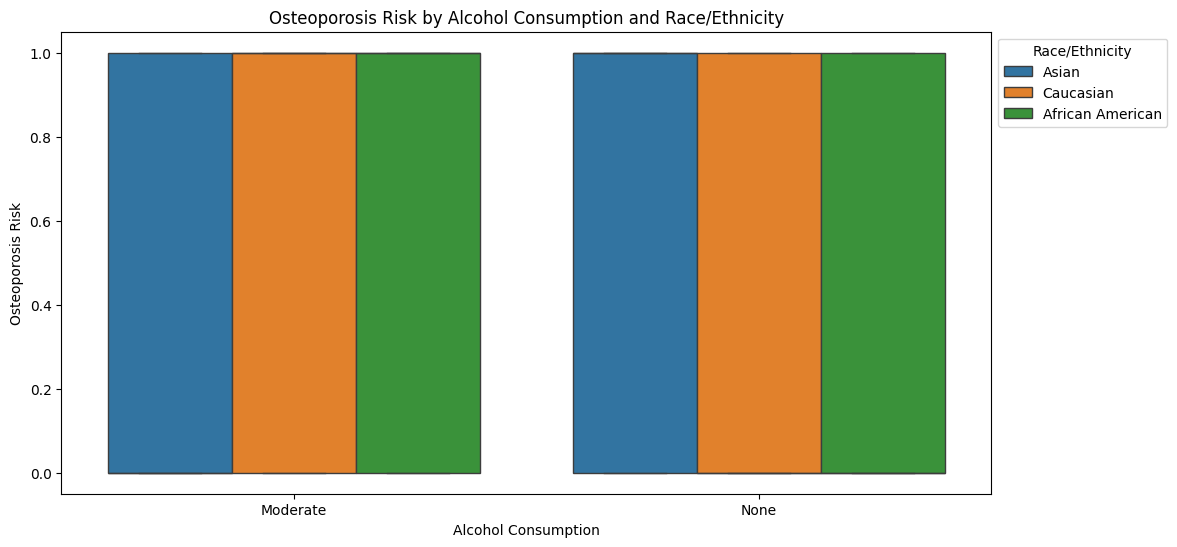

In [46]:
# Osteoporosis risk by alcohol consumption and race/ethnicity

plt.figure(figsize=(12,6))
sns.boxplot(x='Alcohol Consumption', y='Osteoporosis', hue='Race/Ethnicity',data=df)
plt.xlabel('Alcohol Consumption') 
plt.ylabel('Osteoporosis Risk')
plt.title('Osteoporosis Risk by Alcohol Consumption and Race/Ethnicity')
plt.legend(title='Race/Ethnicity', bbox_to_anchor=(1, 1))
plt.show()

# **Prior Fractures and Medical Conditions Impact:**

**How do prior fractures and medical conditions collectively impact osteoporosis risk?**

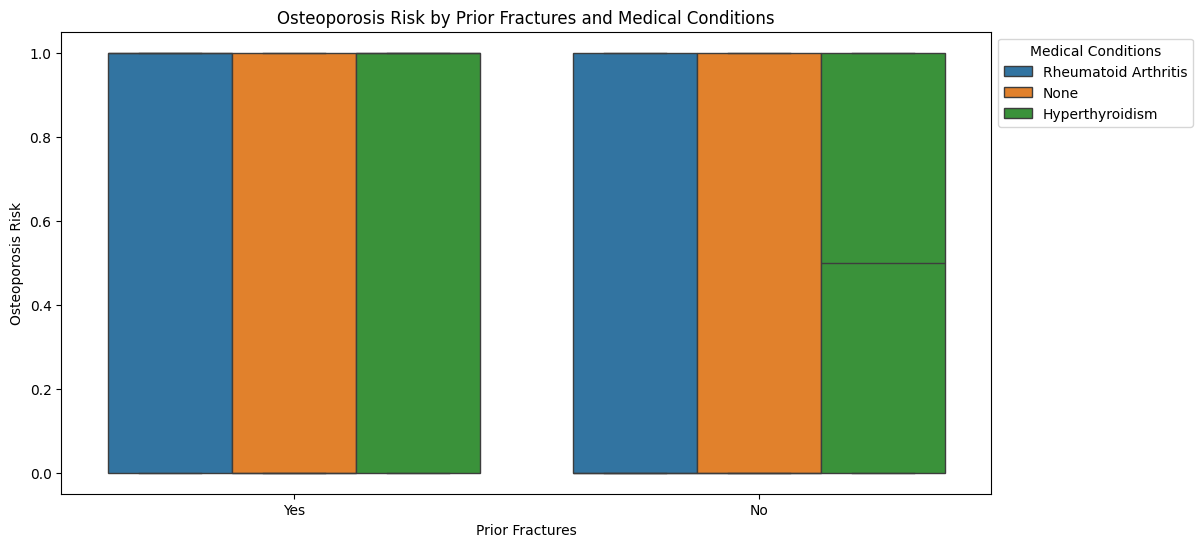

In [47]:
# Osteoporosis risk by prior fractures and medical conditions

plt.figure(figsize=(12,6))
sns.boxplot(x='Prior Fractures', y='Osteoporosis', hue='Medical Conditions', data=df) 
plt.title('Osteoporosis Risk by Prior Fractures and Medical Conditions')
plt.xlabel('Prior Fractures') 
plt.ylabel('Osteoporosis Risk')
plt.legend(title='Medical Conditions', bbox_to_anchor= (1, 1))
plt.show()

In [48]:
df['Age_Group'] = pd.cut(df['Age'], bins=3 , labels=["18-42", "43-60", "60-More"])
# I made Age Column. Because the minimum age is 18 and the maximum age is 90, there are more numbers in between this range, 
# thus for analysis, we created an age group.

In [49]:
df.shape

(1958, 16)

In [50]:
a=df[df['Age_Group']=='18-42']
b=df[df['Age_Group']=='43-60']
c=df[df['Age_Group']=='60-More']

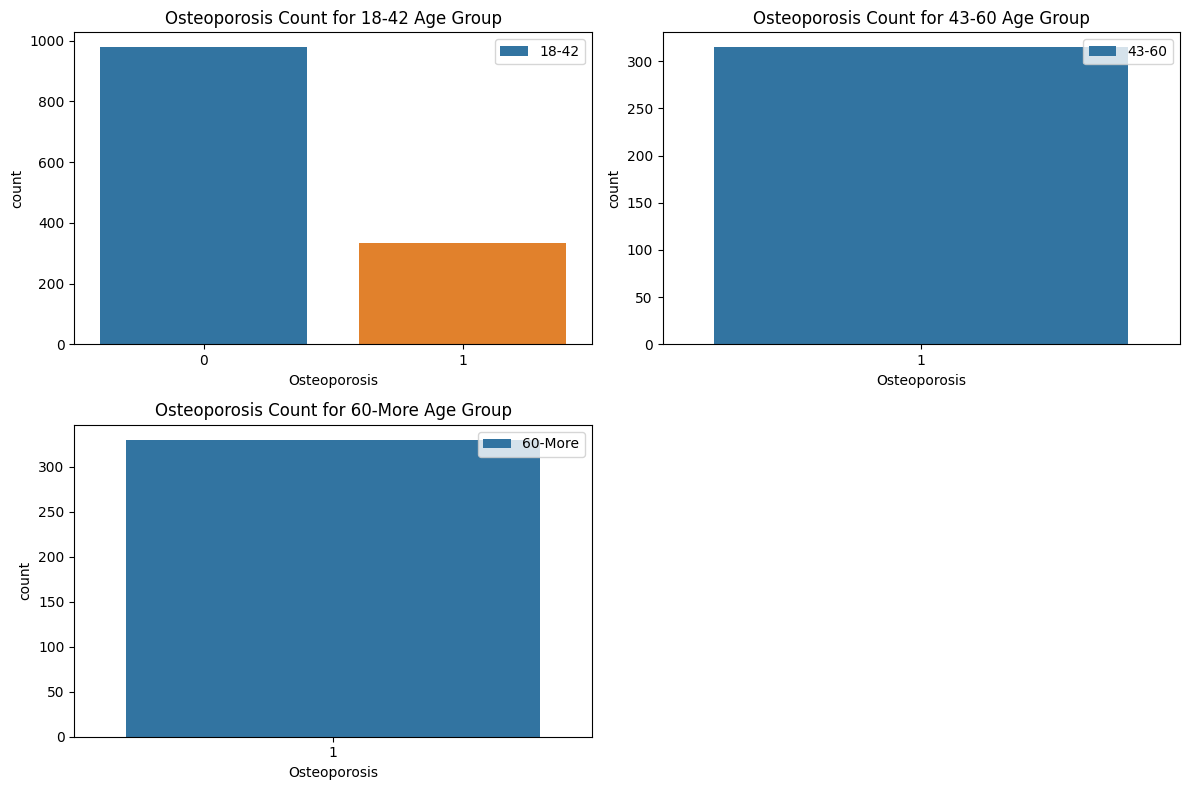

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming a, b, c are dataframes for different age groups

plt.figure(figsize=(12, 8))

# Plot for age group 18-30
plt.subplot(221)
sns.countplot(x=a["Osteoporosis"], hue=a["Osteoporosis"])
plt.legend(["18-42"])
plt.title("Osteoporosis Count for 18-42 Age Group")

# Plot for age group 31-46
plt.subplot(222)
sns.countplot(x=b["Osteoporosis"], hue=b["Osteoporosis"])
plt.legend(["43-60"])
plt.title("Osteoporosis Count for 43-60 Age Group")

# Plot for age group 47-72
plt.subplot(223)
sns.countplot(x=c["Osteoporosis"], hue=c["Osteoporosis"])
plt.legend(["60-More"])
plt.title("Osteoporosis Count for 60-More Age Group")


plt.tight_layout()
plt.show()

**I observed that all the age group has Osteoporosis but it is more observed in older age groups.**

In [52]:
df.drop('Age_Group', axis=1, inplace=True)

In [53]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity', 
                     'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 
                     'Medical Conditions', 'Smoking', 'Alcohol Consumption', 'Prior Fractures', 
                     'Medications']

label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Now the specified columns have been label encoded in the DataFrame df

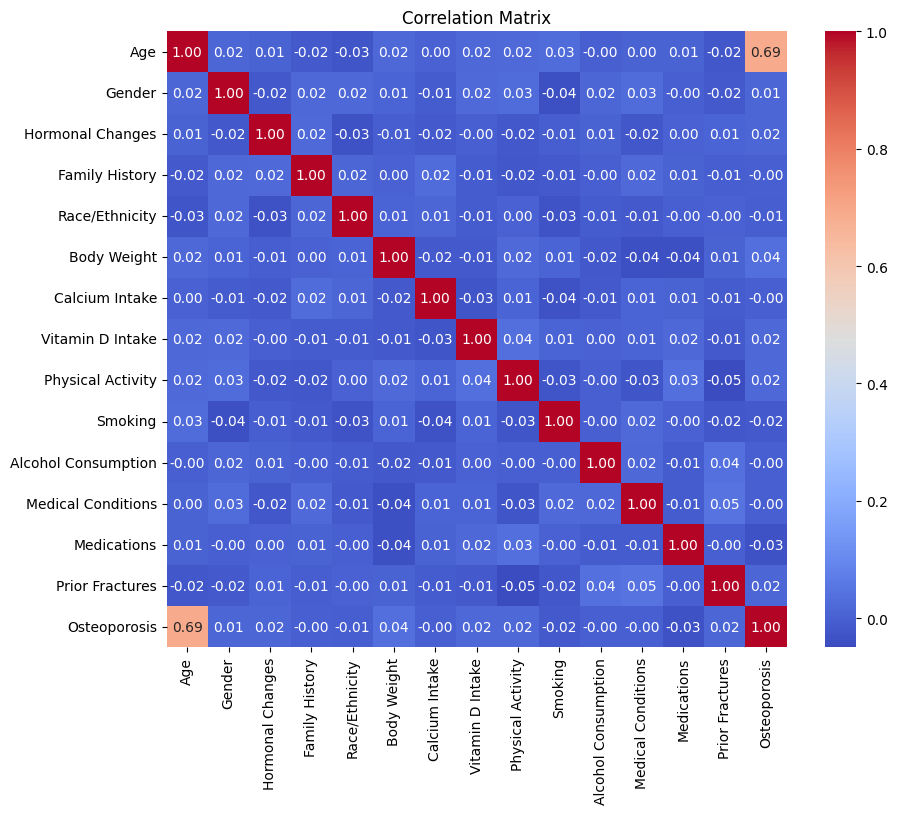

In [54]:
# Assuming df is your DataFrame and 'Osteoporosis' is your target column
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Summary statistics
summary_stats = df.describe()

# Correlation matrix
correlation_matrix = df.corr()


Looking at the correlation matrix we can see that the categorical features do not have much impact on the target. The main driver is "Age".

In [55]:
# Calculate the correlation between age and osteoporosis
age_osteoporosis_corr = df['Age'].corr(df['Osteoporosis'])
print(f"Correlation between age and osteoporosis: {age_osteoporosis_corr}")

# Calculate the correlation between gender and osteoporosis
gender_osteoporosis_corr = df['Gender'].apply(lambda x: 1 if x == 'Female' else 0).corr(df['Osteoporosis'])
print(f"Correlation between gender and osteoporosis: {gender_osteoporosis_corr}")

# Calculate the correlation between hormonal changes and osteoporosis
hormonal_osteoporosis_corr = df['Hormonal Changes'].apply(lambda x: 1 if x == 'Postmenopausal' else 0).corr(df['Osteoporosis'])
print(f"Correlation between hormonal changes and osteoporosis: {hormonal_osteoporosis_corr}")

# Calculate the correlation between family history and osteoporosis
family_osteoporosis_corr = df['Family History'].apply(lambda x: 1 if x == 'Yes' else 0).corr(df['Osteoporosis'])
print(f"Correlation between family history and osteoporosis: {family_osteoporosis_corr}")

# Calculate the correlation between medications and osteoporosis
medications_osteoporosis_corr = df['Medications'].apply(lambda x: 1 if x == 'Corticosteroids' else 0).corr(df['Osteoporosis'])
print(f"Correlation between medications and osteoporosis: {medications_osteoporosis_corr}")

# Calculate the correlation between prior fractures and osteoporosis
fractures_osteoporosis_corr = df['Prior Fractures'].apply(lambda x: 1 if x == 'Yes' else 0).corr(df['Osteoporosis'])
print(f"Correlation between prior fractures and osteoporosis: {fractures_osteoporosis_corr}")

Correlation between age and osteoporosis: 0.6912382540603558
Correlation between gender and osteoporosis: nan
Correlation between hormonal changes and osteoporosis: nan
Correlation between family history and osteoporosis: nan
Correlation between medications and osteoporosis: nan
Correlation between prior fractures and osteoporosis: nan


# The choice of models in this project covers a wide range of machine learning algorithms, each with its own strengths and weaknesses:

- **Logistic Regression**: A simple and interpretable model suitable for binary classification tasks.
- **Support Vector Classifier (SVC)**: Performs well with high-dimensional data and can handle non-linear relationships.
- **RandomForestClassifier**: An ensemble method that combines multiple decision trees to improve accuracy and robustness.
- **K-Nearest Neighbors (KNN)**: A non-parametric method that performs well when the decision boundaries are irregular.
- **Decision Tree Classifier**: Provides interpretable rules for classification and can handle both numerical and categorical features.
- **Gradient Boosting Classifier**: An ensemble method that combines weak learners (e.g., decision trees) to create a strong classifier, often achieving high performance.


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grids for each model
param_grid_lr = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
# 'C' is the regularization parameter. The values [0.1, 1, 10] indicate different regularization strengths.
#'solver' specifies the algorithm to use in the optimization problem. 'liblinear' and 'lbfgs' are different solvers. 

param_grid_dt = {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
#'max_depth' specifies the maximum depth of the tree.
# 'min_samples_split' is the minimum number of samples required to split an internal node.
# 'min_samples_leaf' is the minimum number of samples required to be at a leaf node.


param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
# 'C' is the regularization parameter.
# 'kernel' specifies the kernel type. 'linear' and 'rbf' are different kernel functions.


param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}
# 'n_estimators' is the number of trees in the forest.
# 'max_depth' specifies the maximum depth of the trees.
#'min_samples_split' is the minimum number of samples required to split an internal node.

param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
# 'n_neighbors' is the number of neighbors to consider.
# 'weights' specifies the weight function used in prediction. 'uniform' assigns equal weight, while 'distance' weights by the inverse of distance.

param_grid_gb = {'learning_rate': [0.1, 0.01], 'n_estimators': [100, 200], 'max_depth': [3, 5]}
# 'learning_rate' controls the contribution of each tree to the model.
# 'n_estimators' is the number of boosting stages.
# 'max_depth' specifies the maximum depth of the individual trees.

# Assuming df is your DataFrame and 'Osteoporosis' is your target column
X = df.drop(['Osteoporosis'], axis=1)  # Exclude 'Id' column
y = df['Osteoporosis']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Classifier": SVC(),
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier()
}

# Perform Grid Search for each model
for model_name, model in models.items():
    if model_name == "Decision Tree":
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid_dt, cv=3, scoring='accuracy')
    elif model_name == "Support Vector Classifier":
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid_svc, cv=3, scoring='accuracy')
    elif model_name == "RandomForestClassifier":
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid_rf, cv=3, scoring='accuracy')
    elif model_name == "K-Nearest Neighbors":
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid_knn, cv=3, scoring='accuracy')
    elif model_name == "Gradient Boosting Classifier":
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid_gb, cv=3, scoring='accuracy')
    else:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid_lr, cv=3, scoring='accuracy')

    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters for {model_name}: {best_params}")

Best Hyperparameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best Hyperparameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Hyperparameters for Support Vector Classifier: {'C': 10, 'kernel': 'rbf'}
Best Hyperparameters for RandomForestClassifier: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
Best Hyperparameters for K-Nearest Neighbors: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}
Best Hyperparameters for Gradient Boosting Classifier: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the models
models = {
    "Logistic Regression": LogisticRegression(C= 0.1, solver= 'liblinear'),
    "Support Vector Classifier": SVC(C= 10, kernel= 'rbf'),
    "RandomForestClassifier": RandomForestClassifier(max_depth= 5, min_samples_split= 10, n_estimators= 100),
    "K-Nearest Neighbors": KNeighborsClassifier(algorithm= 'auto', n_neighbors= 7, weights= 'uniform'),
    "Decision Tree": DecisionTreeClassifier(max_depth= 5, min_samples_leaf= 4, min_samples_split= 2),
    "Gradient Boosting Classifier": GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3, n_estimators= 100)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"{name} Metrics:")
    print(f"  Accuracy: {accuracy * 100:.2f}%")
    print(f"  Precision: {precision:.2f}")
    print(f"  Recall: {recall:.2f}")
    print(f"  F1-score: {f1:.2f}")

Logistic Regression Metrics:
  Accuracy: 81.63%
  Precision: 0.86
  Recall: 0.76
  F1-score: 0.81
Support Vector Classifier Metrics:
  Accuracy: 83.16%
  Precision: 0.94
  Recall: 0.71
  F1-score: 0.81
RandomForestClassifier Metrics:
  Accuracy: 84.18%
  Precision: 0.95
  Recall: 0.73
  F1-score: 0.82
K-Nearest Neighbors Metrics:
  Accuracy: 85.97%
  Precision: 0.94
  Recall: 0.77
  F1-score: 0.85
Decision Tree Metrics:
  Accuracy: 90.05%
  Precision: 1.00
  Recall: 0.80
  F1-score: 0.89
Gradient Boosting Classifier Metrics:
  Accuracy: 90.82%
  Precision: 0.99
  Recall: 0.82
  F1-score: 0.90


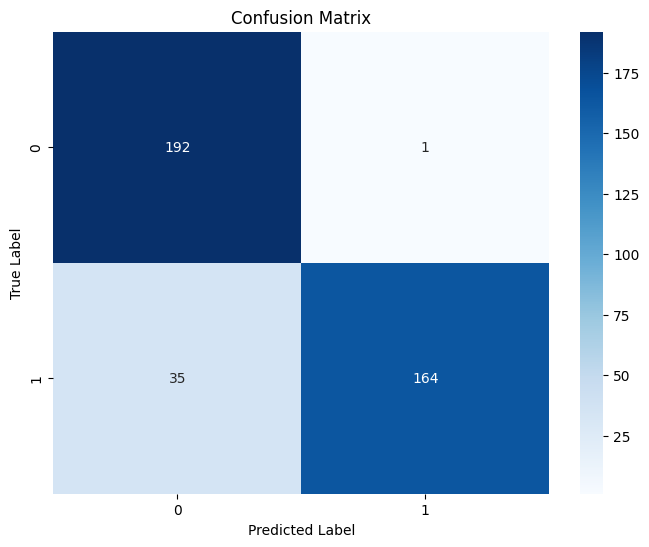

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already trained your models and made predictions
y_true = y_test  # True labels from the test set
y_pred = model.predict(X_test)  # Predicted labels

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create the confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Type 1 error is a false positive conclusion
# Type II error is a false negative conclusion

# Feature Importance Analysis

In [59]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(['Osteoporosis'], axis=1)
y = df['Osteoporosis']

# Initialize the model
rf = RandomForestClassifier()

# Fit the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)

                feature  importance
0                   Age    0.626883
4        Race/Ethnicity    0.046007
11   Medical Conditions    0.045195
10  Alcohol Consumption    0.027803
13      Prior Fractures    0.027236
6        Calcium Intake    0.026774
5           Body Weight    0.026441
1                Gender    0.025995
7      Vitamin D Intake    0.025315
2      Hormonal Changes    0.025132
3        Family History    0.024587
8     Physical Activity    0.024452
12          Medications    0.024323
9               Smoking    0.023856


In this project, we analyzed an osteoporosis dataset to understand the factors influencing osteoporosis risk. We used a 
  combination of exploratory data analysis (EDA) and machine learning techniques to gain insights into the dataset.

# Key Findings:

1. Looking at the correlation matrix we can see that the categorical features do not have much impact on the target. The       main driver is "Age".

2. Age and Gender: Older individuals and females are more prone to osteoporosis.

3. Hormonal Change: Hormonal changes play a significant role in osteoporosis risk.

4. Family History: Individuals with a family history of osteoporosis are more likely to develop the condition.

5. Race/Ethnicity: Race/ethnicity can influence the prevalence of osteoporosis.

6. Body Weight, Calcium Intake, and Vitamin D Intake: These factors are important in determining osteoporosis risk.

7. Physical Activity, Smoking, and Alcohol Consumption: These lifestyle factors also play a role in osteoporosis risk.

8. Medical Conditions and Medications: Certain medical conditions and medications are associated with an increased risk        of osteoporosis.

9. Prior Fractures: A history of prior fractures can increase the risk of osteoporosis.


# Recommendations:

1. Encourage regular screenings, especially for older individuals and females.

2. Prioritize early osteoporosis prevention strategies for individuals aged 18-30 to safeguard bone health and reduce          long-term risks.

3. Promote healthy lifestyle choices, including adequate calcium and vitamin D intake, regular physical activity, and          avoiding smoking and excessive alcohol consumption.

4. Raise awareness about the importance of family history in assessing osteoporosis risk.

5. Educate healthcare professionals about the impact medications and medical conditions on osteoporosis risk.

6. Avoid smoking and excessive alcohol consumption for better bone health.

# Future Work:

1. Incorporate genetic data to better understand the genetic factors influencing osteoporosis risk.

2. Explore additional datasets to validate findings and identify new risk factors.

3. Develop predictive models to identify individuals at high risk of developing osteoporosis.

Summary: Overall, this project provides valuable insights into the factors influencing osteoporosis risk, 
    # which can help healthcare professionals in early detection and prevention strategies. Further research and 
    # collaboration are needed to address the complex nature of osteoporosis and improve patient outcomes.

# Limitations:

1. Limited dataset size may impact the model's generalizability.

2. Missing data in certain columns could affect the analysis.